Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Data Dictionary
---------------
Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

Variable : Description

Loan_ID : Unique Loan ID

Gender : Male/ Female

Married : Applicant married (Y/N)

Dependents : Number of dependents

Education : Applicant Education (Graduate/ Under Graduate)

Self_Employed : Self employed (Y/N)

ApplicantIncome : Applicant income

CoapplicantIncome : Coapplicant income

LoanAmount : Loan amount in thousands

Loan_Amount_Term : Term of loan in months

Credit_History : credit history meets guidelines

Property_Area : Urban/ Semi Urban/ Rural

Loan_Status : (Target) Loan approved (Y/N)

Test file: CSV containing the customer information for whom loan eligibility is to be predicted

Variable : Description

Loan_ID : Unique Loan ID

Gender : Male/ Female

Married : Applicant married (Y/N)

Dependents : Number of dependents

Education : Applicant Education (Graduate/ Under Graduate)

Self_Employed : Self employed (Y/N)

ApplicantIncome : Applicant income

CoapplicantIncome : Coapplicant income

LoanAmount : Loan amount in thousands

Loan_Amount_Term : Term of loan in months

Credit_History : credit history meets guidelines

Property_Area : Urban/ Semi Urban/ Rural

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train = pd.read_csv('/home/dwijendra/Analytics_Vidhya/Loan Prediction/train_ctrUa4K.csv')
test = pd.read_csv('/home/dwijendra/Analytics_Vidhya/Loan Prediction/test_lAUu6dG.csv')

In [8]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [9]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


## Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

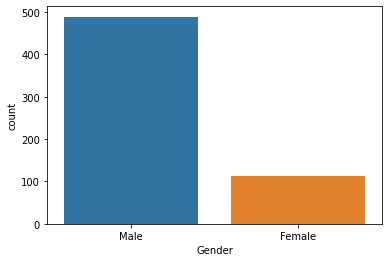

In [13]:
sns.countplot(data = train,x='Gender')

<AxesSubplot:xlabel='Gender', ylabel='count'>

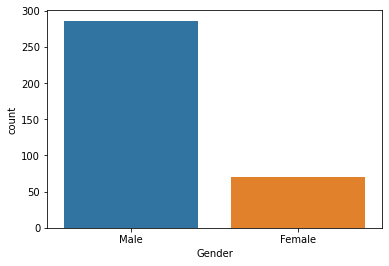

In [14]:
sns.countplot(data = test,x='Gender')

In [15]:
print(train.Gender.isnull().sum())
print(test.Gender.isnull().sum())

13
11


In [16]:
train.Gender = train.Gender.fillna(train.Gender.mode()[0])
test.Gender = test.Gender.fillna(train.Gender.mode()[0])

In [17]:
print(train.Gender.isnull().sum())
print(test.Gender.isnull().sum())

0
0


In [18]:
train.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [19]:
train['Gender'] = (train['Gender'].values == 'Female').astype(int)

In [20]:
train.Gender.value_counts()

0    502
1    112
Name: Gender, dtype: int64

In [21]:
test['Gender'] = (test['Gender'].values == 'Female').astype(int)

In [22]:
test.Gender.value_counts()

0    297
1     70
Name: Gender, dtype: int64

## Married

In [23]:
print(train.Married.isnull().sum())
print(test.Married.isnull().sum())

3
0


In [24]:
train.Married = train.Married.fillna(train.Married.mode()[0])

In [25]:
print(train.Married.isnull().sum())
print(test.Married.isnull().sum())

0
0


In [26]:
print(train.Married.value_counts())
print(test.Married.value_counts())

Yes    401
No     213
Name: Married, dtype: int64
Yes    233
No     134
Name: Married, dtype: int64


In [27]:
train['Married'] = (train['Married'].values == 'No').astype(int)
test['Married'] = (test['Married'].values == 'No').astype(int)

In [28]:
print(train.Married.value_counts())
print(test.Married.value_counts())

0    401
1    213
Name: Married, dtype: int64
0    233
1    134
Name: Married, dtype: int64


## Dependents

In [29]:
print(train.Dependents.isnull().sum())
print(test.Dependents.isnull().sum())

15
10


In [30]:
print(train.Dependents.value_counts())
print(test.Dependents.value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64


In [31]:
train.Dependents = train.Dependents.fillna(train.Dependents.mode()[0])
test.Dependents = test.Dependents.fillna(test.Dependents.mode()[0])

In [32]:
print(train.Dependents.isnull().sum())
print(test.Dependents.isnull().sum())

0
0


In [33]:
train.Dependents = train.Dependents.str.replace('+','')
test.Dependents = test.Dependents.str.replace('+','')

/tmp/ipykernel_7497/2383999919.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train.Dependents = train.Dependents.str.replace('+','')
/tmp/ipykernel_7497/2383999919.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test.Dependents = test.Dependents.str.replace('+','')


In [34]:
print(train.Dependents.value_counts())
print(test.Dependents.value_counts())

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64
0    210
2     59
1     58
3     40
Name: Dependents, dtype: int64


## Education

In [35]:
print(train.Education.value_counts())
print(test.Education.value_counts())

Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Graduate        283
Not Graduate     84
Name: Education, dtype: int64


In [36]:
train['Education'] = (train['Education'].values == 'Not Graduate').astype(int)
test['Education'] = (test['Education'].values == 'Not Graduate').astype(int)

In [37]:
print(train.Education.value_counts())
print(test.Education.value_counts())

0    480
1    134
Name: Education, dtype: int64
0    283
1     84
Name: Education, dtype: int64


## Self_Employed

In [38]:
print(train.Self_Employed.isnull().sum())
print(test.Self_Employed.isnull().sum())

32
23


In [39]:
train.Self_Employed = train.Self_Employed.fillna(train.Self_Employed.mode()[0])
test.Self_Employed = test.Self_Employed.fillna(test.Self_Employed.mode()[0])

In [40]:
print(train.Self_Employed.isnull().sum())
print(test.Self_Employed.isnull().sum())

0
0


In [41]:
print(train.Self_Employed.value_counts())
print(test.Self_Employed.value_counts())

No     532
Yes     82
Name: Self_Employed, dtype: int64
No     330
Yes     37
Name: Self_Employed, dtype: int64


In [42]:
train['Self_Employed'] = (train['Self_Employed'].values == 'Yes').astype(int)
test['Self_Employed'] = (test['Self_Employed'].values == 'Yes').astype(int)

In [43]:
print(train.Self_Employed.value_counts())
print(test.Self_Employed.value_counts())

0    532
1     82
Name: Self_Employed, dtype: int64
0    330
1     37
Name: Self_Employed, dtype: int64


## Loan Amount

In [44]:
print(train.LoanAmount.isnull().sum())
print(test.LoanAmount.isnull().sum())

22
5


In [45]:
train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean())
test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.mean())

In [46]:
print(train.LoanAmount.isnull().sum())
print(test.LoanAmount.isnull().sum())

0
0


## Loan Amount Term

In [47]:
print(train.Loan_Amount_Term.isnull().sum())
print(test.Loan_Amount_Term.isnull().sum())

14
6


In [48]:
train.Loan_Amount_Term = train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0])
test.Loan_Amount_Term = test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mode()[0])

In [49]:
print(train.Loan_Amount_Term.isnull().sum())
print(test.Loan_Amount_Term.isnull().sum())

0
0


In [50]:
print(train.Loan_Amount_Term.value_counts())
print(test.Loan_Amount_Term.value_counts())

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
360.0    317
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64


In [51]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('int64')
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype('int64')

In [52]:
print(train.Loan_Amount_Term.value_counts())
print(test.Loan_Amount_Term.value_counts())

360    526
180     44
480     15
300     13
240      4
84       4
120      3
60       2
36       2
12       1
Name: Loan_Amount_Term, dtype: int64
360    317
180     22
480      8
300      7
240      4
84       3
60       1
12       1
350      1
36       1
120      1
6        1
Name: Loan_Amount_Term, dtype: int64


## Credit History

In [53]:
print(train.Credit_History.isnull().sum())
print(test.Credit_History.isnull().sum())

50
29


In [54]:
train.Credit_History = train.Credit_History.fillna(train.Credit_History.mode()[0])
test.Credit_History = test.Credit_History.fillna(test.Credit_History.mode()[0])

In [55]:
print(train.Credit_History.isnull().sum())
print(test.Credit_History.isnull().sum())

0
0


In [56]:
train['Credit_History'] = train['Credit_History'].astype('int64')
test['Credit_History'] = test['Credit_History'].astype('int64')

## Property Area

In [57]:
test.Property_Area.value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

In [58]:
train = train.join(pd.get_dummies(train.Property_Area,drop_first=True))
test = test.join(pd.get_dummies(train.Property_Area,drop_first=True))

## Loan Status

In [61]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [62]:
train['Loan_Status'] = (train['Loan_Status'].values == 'N').astype(int)

In [63]:
train.Loan_Status.value_counts()

0    422
1    192
Name: Loan_Status, dtype: int64

In [64]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Semiurban,Urban
0,LP001002,0,1,0,0,0,5849,0.0,146.412162,360,1,Urban,0,0,1
1,LP001003,0,0,1,0,0,4583,1508.0,128.000000,360,1,Rural,1,0,0
2,LP001005,0,0,0,0,1,3000,0.0,66.000000,360,1,Urban,0,0,1
3,LP001006,0,0,0,1,0,2583,2358.0,120.000000,360,1,Urban,0,0,1
4,LP001008,0,1,0,0,0,6000,0.0,141.000000,360,1,Urban,0,0,1


In [65]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Semiurban,Urban
0,LP001015,0,0,0,0,0,5720,0,110.0,360,1,Urban,0,1
1,LP001022,0,0,1,0,0,3076,1500,126.0,360,1,Urban,0,0
2,LP001031,0,0,2,0,0,5000,1800,208.0,360,1,Urban,0,1
3,LP001035,0,0,2,0,0,2340,2546,100.0,360,1,Urban,0,1
4,LP001051,0,1,0,1,0,3276,0,78.0,360,1,Urban,0,1


In [66]:
train = train.drop(columns=['Property_Area','Loan_ID'], axis = 1)
test = test.drop(columns=['Property_Area','Loan_ID'], axis = 1)

In [67]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,0,1,0,0,0,5849,0.0,146.412162,360,1,0,0,1
1,0,0,1,0,0,4583,1508.0,128.000000,360,1,1,0,0
2,0,0,0,0,1,3000,0.0,66.000000,360,1,0,0,1
3,0,0,0,1,0,2583,2358.0,120.000000,360,1,0,0,1
4,0,1,0,0,0,6000,0.0,141.000000,360,1,0,0,1


In [68]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
0,0,0,0,0,0,5720,0,110.0,360,1,0,1
1,0,0,1,0,0,3076,1500,126.0,360,1,0,0
2,0,0,2,0,0,5000,1800,208.0,360,1,0,1
3,0,0,2,0,0,2340,2546,100.0,360,1,0,1
4,0,1,0,1,0,3276,0,78.0,360,1,0,1


In [69]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [70]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
for col in numerical_cols:
    train[col] = ss.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = ss.transform(test[col].values.reshape(-1, 1))

In [71]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,0,1,0,0,0,0.072991,-0.554487,0.000000,0.273231,1,0,0,1
1,0,0,1,0,0,-0.134412,-0.038732,-0.219273,0.273231,1,1,0,0
2,0,0,0,0,1,-0.393747,-0.554487,-0.957641,0.273231,1,0,0,1
3,0,0,0,1,0,-0.462062,0.251980,-0.314547,0.273231,1,0,0,1
4,0,1,0,0,0,0.097728,-0.554487,-0.064454,0.273231,1,0,0,1


In [72]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
0,0,0,0,0,0,0.051857,-0.554487,-0.433638,0.273231,1,0,1
1,0,0,1,0,0,-0.381297,-0.041468,-0.243092,0.273231,1,0,0
2,0,0,2,0,0,-0.066097,0.061136,0.733459,0.273231,1,0,1
3,0,0,2,0,0,-0.501872,0.316278,-0.552730,0.273231,1,0,1
4,0,1,0,1,0,-0.348532,-0.554487,-0.814731,0.273231,1,0,1


In [73]:
y = train.Loan_Status
X = train.drop('Loan_Status',axis=1)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
lr = RandomForestClassifier(n_estimators=15000,random_state=42)
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
accuracy = accuracy_score(y_test,pred)
accuracy

0.7980295566502463

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(use_label_encoder=False,random_state=42)
xgb.fit(X_train,y_train)
pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test,pred)
accuracy

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(kernel = 'linear',random_state=42)
svc.fit(X_train,y_train)
pred = svc.predict(X_test)
accuracy = accuracy_score(y_test,pred)
accuracy

0.7980295566502463

In [ ]:
submission = pd.read_csv('/home/dwijendra/Analytics_Vidhya/Loan Prediction/sample_submission_49d68Cx.csv')
submission.Loan_Status = pred


In [82]:
submission.to_csv('sample_submission.csv', index=False)